# Combining and Shaping Data

## Data Cleaning

Example - you may need to clean missing data or clean outliers (geniune or bad data points).

In [1]:
import pandas as pd
import numpy as np 

In [23]:
columns = ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)']
df = pd.read_csv('data/mall-customers-info.csv', usecols=columns)
df = df.rename(columns={'Genre':'Gender'})
df.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [9]:
df.shape

(200, 4)

In [13]:
df2_column = ['CustomerID', 'Spending Score (1-100)']
df2 = pd.read_csv('data/mall-customers-info.csv', usecols=df2_column)
df2.head()

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40


In [21]:
df2.shape

(200, 2)

In [24]:
joined_df = pd.merge(df, df2,on='CustomerID')
joined_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
joined_df.shape

(200, 5)

In [27]:
dfn = joined_df.copy()

In [28]:
dfn.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [29]:
dfn.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


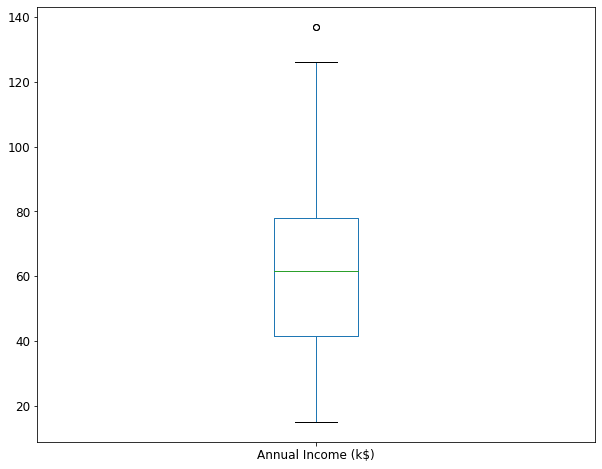

In [30]:
dfn[['Annual Income (k$)']].boxplot(figsize=(10,8), fontsize=12, grid=False)

Lets standardise our data

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_annual_income = scaler.fit_transform(dfn['Annual Income (k$)'].values.reshape(-1,1))

In [33]:
scaled_annual_income.shape

(200, 1)

In [34]:
dfn['scaled_annual_income'] = scaled_annual_income
dfn.scaled_annual_income.describe()

count    2.000000e+02
mean    -6.128431e-16
std      1.002509e+00
min     -1.738999e+00
25%     -7.275093e-01
50%      3.587926e-02
75%      6.656748e-01
max      2.917671e+00
Name: scaled_annual_income, dtype: float64